In [1]:
import os, tqdm, cv2, random
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses, callbacks
from tensorflow.keras.utils import Progbar
from matplotlib import pyplot as plt
from tensorflow.keras import optimizers

In [6]:
a = np.load('./data/2d/x_CBCT_size_48.npy')
# b = np.load('./data/2d/x_COM_size_48.npy')
# c = np.load('./data/2d/x_MCS_size_48.npy')

a_ = np.load('./data/2d/y_CBCT_size_48.npy')
# b_ = np.load('./data/2d/y_COM_size_48.npy')
# c_ = np.load('./data/2d/y_MCS_size_48.npy')

print(a.shape)
# print(b.shape)
# print(c.shape)
print('===================')
print(a_.shape)
# print(b_.shape)
# print(c_.shape)

(19711, 48, 48, 1)
(19711, 48, 48, 3)


In [11]:
root = '/data1/Dental/MCS-CT 영상 데이터-19년7월15일-김정웅/'
root_dict = 'CBCT-Mcs-19-7-1/완료/'

root_paths = os.path.join(root, root_dict)

x_test=[]
y_test=[]

pat_list = os.listdir(root_paths)
    
for pat in pat_list:
    pat_paths = os.path.join(root_paths, pat)

    ori_paths = os.path.join(pat_paths, 'original')
    mxmn_paths = os.path.join(pat_paths, 'Mx Mn') 

    ori_list = [os.path.join(ori_paths, i) for i in sorted(os.listdir(ori_paths))]
    mxmn_list = [os.path.join(mxmn_paths, i) for i in sorted(os.listdir(mxmn_paths))]

    print(pat)

    if len(mxmn_list):
        ori_ = load_3d_vol(ori_list, 'gray')
        mm_ = load_3d_vol(mxmn_list, 'rgb')

        mask_mm = make_mask(mm_).astype(np.uint8)  # 데이터중 float64 데이터 포함되어있음.
        print(ori_.shape, mm_[..., 0].shape, mask_mm[..., 0].shape)

    if ori_.shape != mask_mm[..., 0].shape : 
        print('ori and mask is not same')
        continue
        
    x_test.append(np.array(ori_))
    y_test.append(np.array(mask_mm))

김춘구 1
(256, 512, 512) (256, 512, 512) (256, 512, 512)
천언성 1
(512, 512, 512) (512, 512, 512) (512, 512, 512)
권세환 1
(512, 512, 512) (512, 512, 512) (512, 512, 512)
김은식 1
(256, 512, 512) (256, 512, 512) (256, 512, 512)
정새롬 1
(512, 512, 512) (512, 512, 512) (512, 512, 512)
이재원 1
(171, 512, 512) (171, 512, 512) (171, 512, 512)
최수정 1
(511, 512, 512) (511, 512, 512) (511, 512, 512)
최대린 1
(512, 512, 512) (512, 512, 512) (512, 512, 512)
김태현 1
(171, 512, 512) (171, 512, 512) (171, 512, 512)
양인용 1
(256, 512, 512) (256, 512, 512) (256, 512, 512)
김영재 1
(511, 512, 512) (511, 512, 512) (511, 512, 512)
김동현 1
(512, 512, 512) (512, 512, 512) (512, 512, 512)
김현욱 1
(256, 512, 512) (256, 512, 512) (256, 512, 512)
백미라 1
(171, 512, 512) (171, 512, 512) (171, 512, 512)
천명호 1
(256, 512, 512) (256, 512, 512) (256, 512, 512)
편소라 1
(460, 512, 512) (460, 512, 512) (460, 512, 512)
변상원 1
(256, 512, 512) (256, 512, 512) (256, 512, 512)
김희재 1
(171, 512, 512) (171, 512, 512) (171, 512, 512)
이동은 1
(256, 512, 512) (256, 

In [18]:
x_test-=

(256, 512, 512)

In [14]:
np.save('./data/2d/test/x_test_512.npy', x_test[..., np.newaxis])
np.save('./data/2d/test/y_test_512.npy', y_test)

</br>

# 저장한 test dataset 불러오기

In [20]:
test_x = np.load('./data/2d/test/x_test_512.npy')
test_y = np.load('./data/2d/test/y_test_512.npy')

In [21]:
test_x.shape

(256, 512, 512, 1)

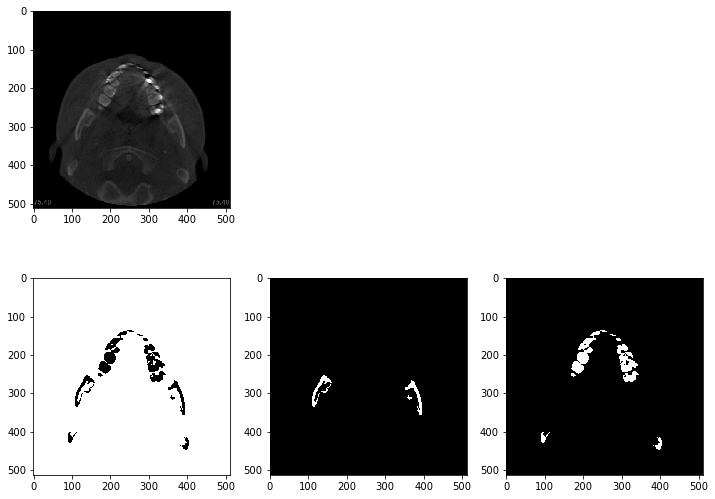

In [22]:
import matplotlib.pyplot as plt

idx = 100

plt.figure(figsize=(12, 9))
plt.subplot(231)
plt.imshow(test_x[idx,..., 0], cmap='gray')

plt.subplot(234)
plt.imshow(test_y[idx,..., 0], cmap='gray')

plt.subplot(235)
plt.imshow(test_y[idx,..., 1], cmap='gray')

plt.subplot(236)
plt.imshow(test_y[idx,..., 2], cmap='gray')

</br>

# model 불러오기

In [2]:
import os, tqdm, cv2, random
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses, callbacks
from tensorflow.keras.utils import Progbar
from matplotlib import pyplot as plt
from tensorflow.keras import optimizers

In [3]:
from utils import *
from network import *
from generator import *

random.seed(777)
np.random.seed(777)
tf.random.set_seed(777)

In [4]:
model = unet(n_class=3, mode = '2d')
model.load_weights('./callback/08_0.0765_0.1859.h5')

# model.compile(optimizer=optimizers.Adam(lr=1e-4), loss='categorical_crossentropy')

test_dir = './data/2d/test/'
val_gen = gen(test_dir, 20)


In [6]:
x_test = np.load('./data/2d/test/x_test_512.npy')
y_test = np.load('./data/2d/test/y_test_512.npy')

In [7]:
print(x_test.shape)
print(y_test.shape)

(256, 512, 512, 1)
(256, 512, 512, 3)


In [9]:
test = model.predict(x_test[95:105])

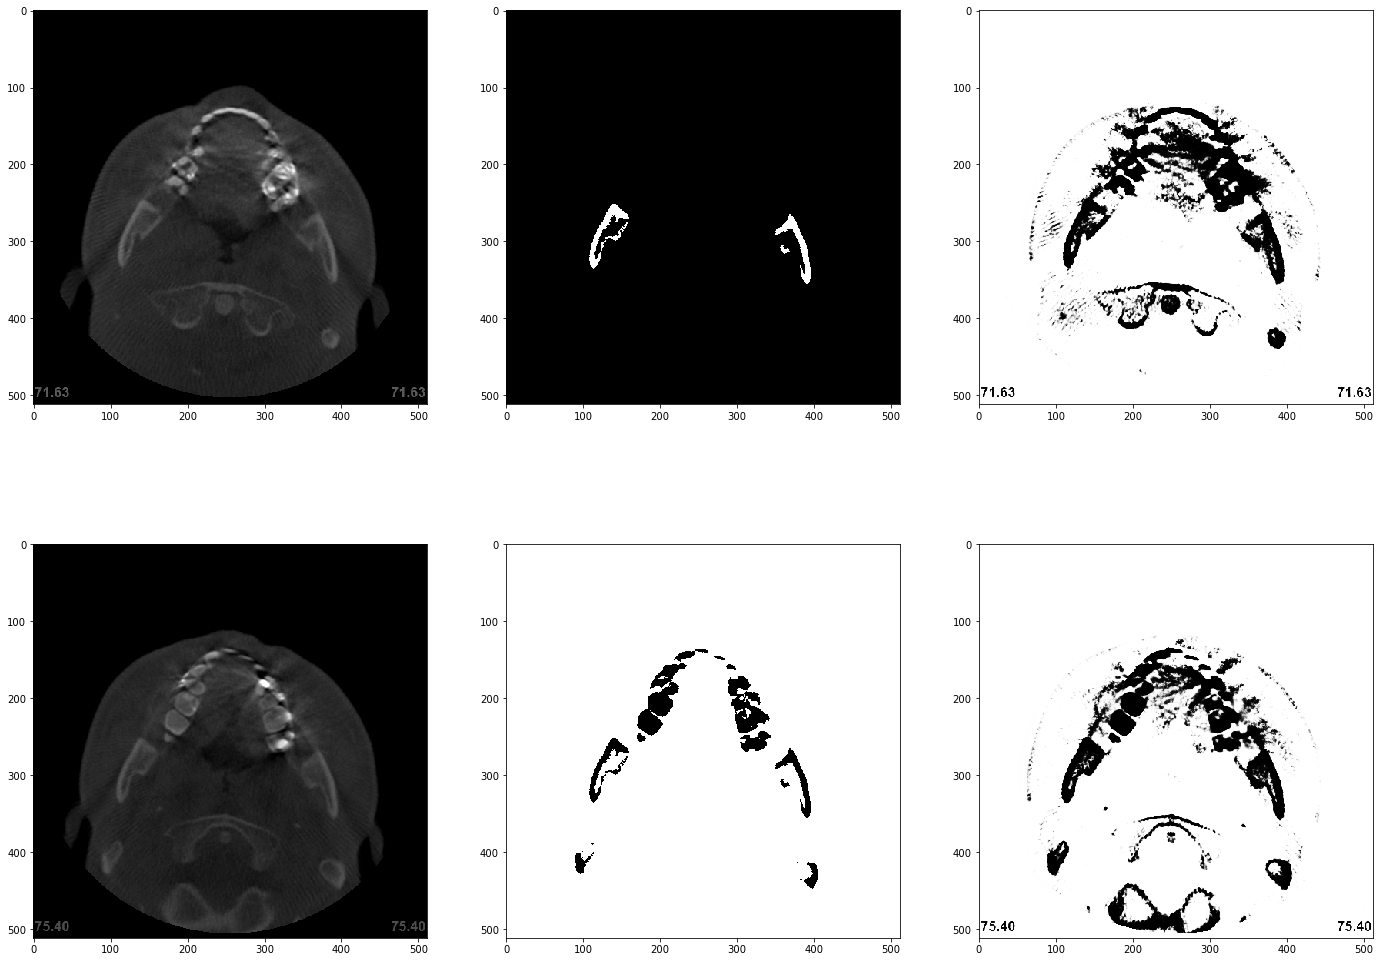

In [12]:
import matplotlib.pyplot as plt

idx = 95

plt.figure(figsize=(24,18))
plt.subplot(231)
plt.imshow(x_test[idx,..., 0], cmap='gray')

plt.subplot(232)
plt.imshow(y_test[idx+5,..., 1], cmap='gray')

plt.subplot(233)
plt.imshow(test[0, ..., 0], cmap='gray')

plt.subplot(234)
plt.imshow(x_test[idx+5,..., 0], cmap='gray')

plt.subplot(235)
plt.imshow(y_test[idx+5,..., 0], cmap='gray')

plt.subplot(236)
plt.imshow(test[5, ..., 0], cmap='gray')



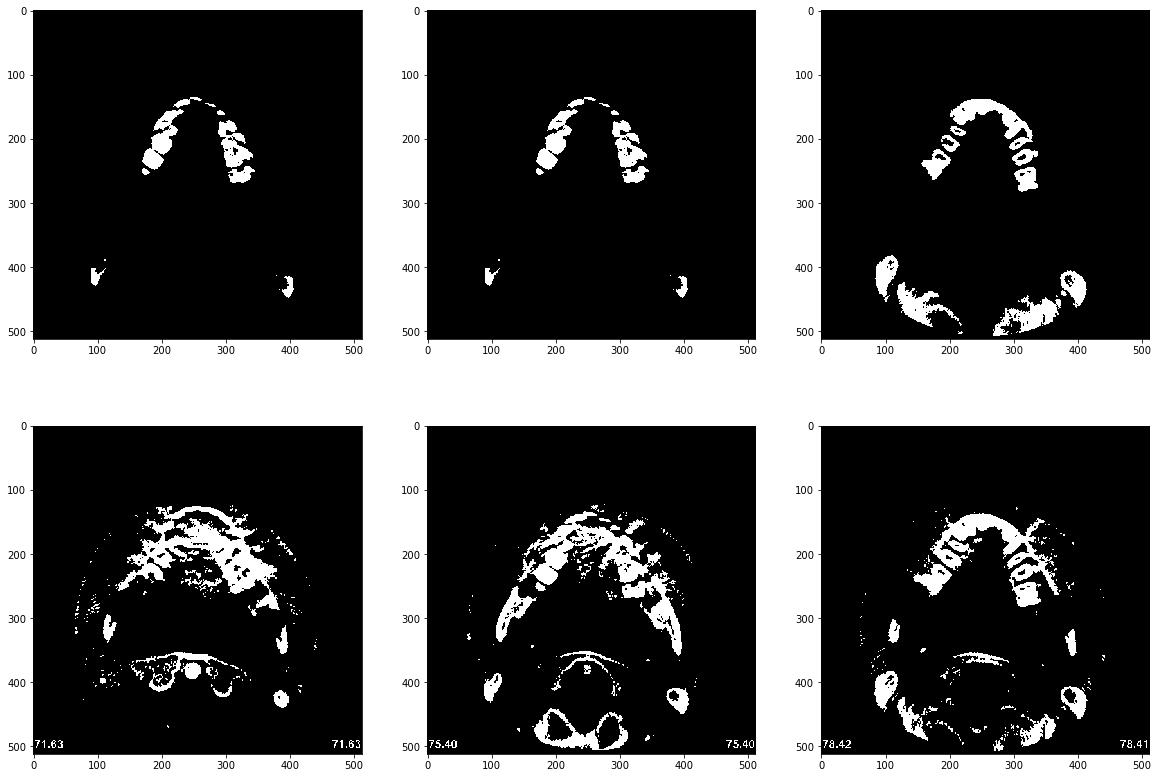

In [22]:
import matplotlib.pyplot as plt

idx = 95
num = 2

plt.figure(figsize=(20,14))
plt.subplot(231)
plt.imshow(y_test[idx+5,..., num], cmap='gray')

plt.subplot(232)
plt.imshow(y_test[idx+5,..., num], cmap='gray')

plt.subplot(233)
plt.imshow(y_test[idx+9,..., num], cmap='gray')

plt.subplot(234)
plt.imshow(a[0, ..., num], cmap='gray')


plt.subplot(235)
plt.imshow(a[5, ..., num], cmap='gray')


plt.subplot(236)
plt.imshow(a[9,..., num], cmap='gray')



In [23]:
def dice_np(y_true, y_pred):
    union = np.sum(np.logical_or(y_true, y_pred), axis=(1, 2))
    inter = np.sum(np.logical_and(y_true, y_pred), axis=(1, 2))
    
    return 2*inter/(union+inter+1e-9)

def jaccard_np(y_true, y_pred):
    union = np.sum(np.logical_or(y_true, y_pred), axis=(1, 2))
    inter = np.sum(np.logical_and(y_true, y_pred), axis=(1, 2))
    
    return inter/(union+1e-9)

In [28]:
y_pred  = a
y_true = y_test[95:105]

print(y_pred.shape, y_true.shape)

(10, 512, 512, 3) (10, 512, 512, 3)


In [35]:
dice = dice_np(y_true, y_pred)
jaccard = jaccard_np(y_true, y_pred)

for i in range(len(dice)):
    print(i,'번째 이미지 비교')
    print('dice = ', dice[i])
    print('jaccard = ', jaccard[i])
    print('===============================================')

0 번째 이미지 비교
dice =  [0.96853643 0.33391538 0.19152684]
jaccard =  [0.93899238 0.20041922 0.10590527]
1 번째 이미지 비교
dice =  [0.96927048 0.26852348 0.27517061]
jaccard =  [0.94037327 0.15508352 0.15953497]
2 번째 이미지 비교
dice =  [0.96841679 0.34550196 0.36845401]
jaccard =  [0.9387675  0.20882585 0.22583121]
3 번째 이미지 비교
dice =  [0.96655735 0.31929662 0.37505194]
jaccard =  [0.93527913 0.18997797 0.23080857]
4 번째 이미지 비교
dice =  [0.96615408 0.2951235  0.36891527]
jaccard =  [0.93452425 0.1731055  0.22617787]
5 번째 이미지 비교
dice =  [0.97175086 0.12061132 0.44071899]
jaccard =  [0.94505391 0.06417582 0.28264244]
6 번째 이미지 비교
dice =  [0.97465535 0.49881746 0.54720198]
jaccard =  [0.95056365 0.33228301 0.37665386]
7 번째 이미지 비교
dice =  [0.97546639 0.53609959 0.56496071]
jaccard =  [0.95210774 0.36621315 0.39369006]
8 번째 이미지 비교
dice =  [0.97938712 0.56256297 0.72859431]
jaccard =  [0.95960686 0.39136529 0.57306202]
9 번째 이미지 비교
dice =  [0.97858575 0.56593169 0.72028667]
jaccard =  [0.95806941 0.39463371 0.